 # Lab 7

## Note

The qubit convention in qiskit is right to left.

For example, $|100\rangle$ decomposition is as follows:

$q_0 = 0$

$q_1 = 0$

$q_2 = 1$

 ## Imports



 Run this first to import all necessary libraries:

In [32]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime.fake_provider import FakeBrisbane, FakeManilaV2, FakeLondonV2, FakeLimaV2, FakeNairobiV2
from qiskit.visualization import plot_histogram

## Basic

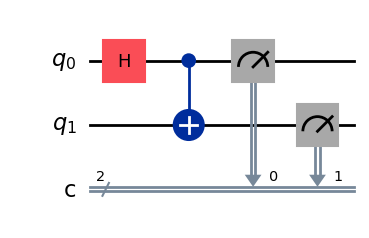

In [33]:
creg = ClassicalRegister(2, 'c')
qreg = QuantumRegister(2, 'q')

qc = QuantumCircuit(qreg, creg)

qc.h(0)
qc.cx(0, 1)

qc.measure(qreg, creg)

qc.draw('mpl')

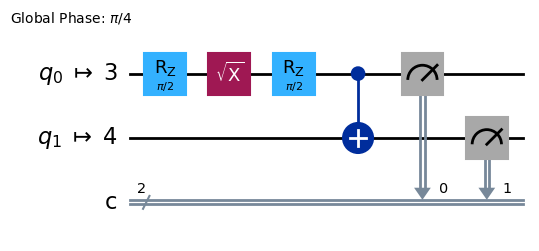

In [34]:
# Draw the transpiled circuit using Manila V2 backend
backend = FakeManilaV2()

sampler = SamplerV2(backend)
transpiled_qc = transpile(qc, backend)

transpiled_qc.draw('mpl')

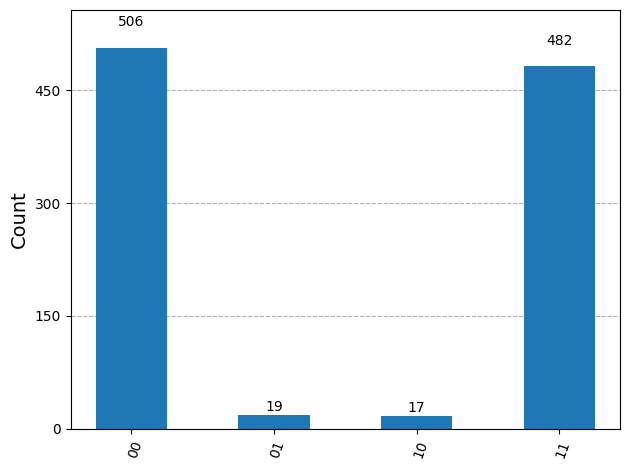

In [35]:
# Execute the transpiled circuit using the SamplerV2
job = sampler.run([transpiled_qc], shots=1024)
result = job.result()[0]
counts_manila = result.join_data().get_counts()
plot_histogram(counts_manila)

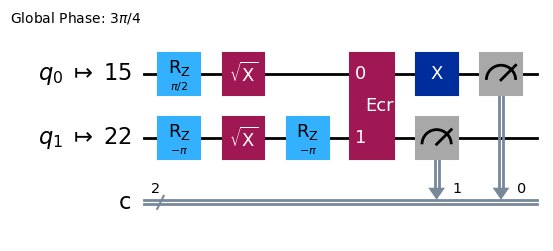

In [36]:
# TODO: Repeat the above steps using the FakeBrisbane backend
# Draw the circuit and plot the counts histogram and observe the differences in transpiled circuits and counts
backend = FakeBrisbane()

sampler = SamplerV2(backend)
transpiled_qc = transpile(qc, backend)

transpiled_qc.draw('mpl')

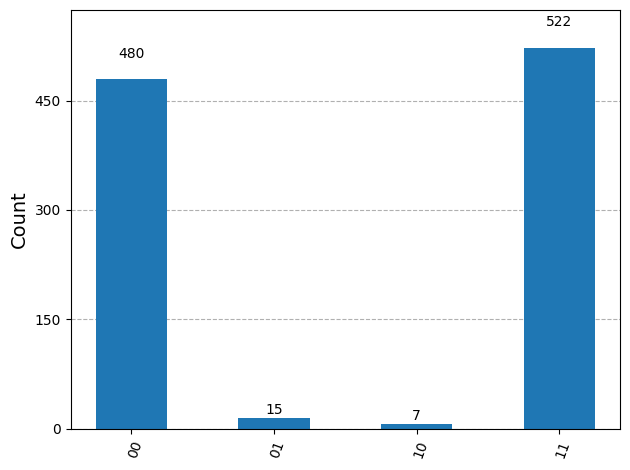

In [37]:
# TODO: Show the counts from Brisbane backend
# Execute the transpiled circuit using the SamplerV2
job = sampler.run([transpiled_qc], shots=1024)
result = job.result()[0]
counts_brisbane = result.join_data().get_counts()
plot_histogram(counts_brisbane)

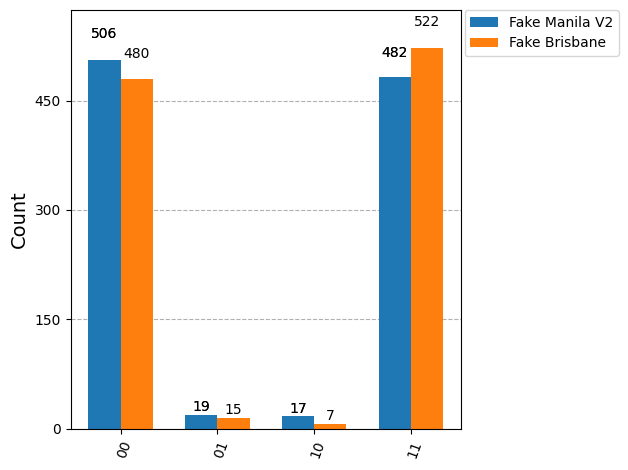

In [38]:
# TODO: Show the counts from both backends in a single histogram
legend = ['Fake Manila V2', 'Fake Brisbane']
plot_histogram([counts_manila, counts_brisbane], legend=legend)

## More on different backends (Orders of qubits and used gates)

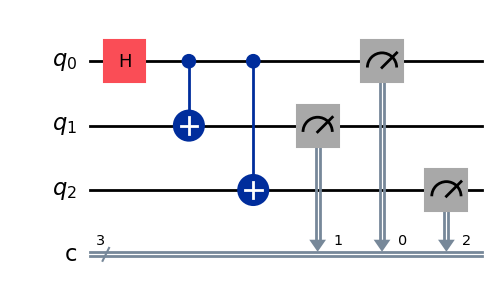

In [39]:
# TODO: Create a GHZ+ state circuit and draw it
creg = ClassicalRegister(3, 'c')
qreg = QuantumRegister(3, 'q')
qc = QuantumCircuit(qreg, creg)

qc.h(0)
qc.cx(0, [1,2])

qc.measure(qreg, creg)

qc.draw('mpl')

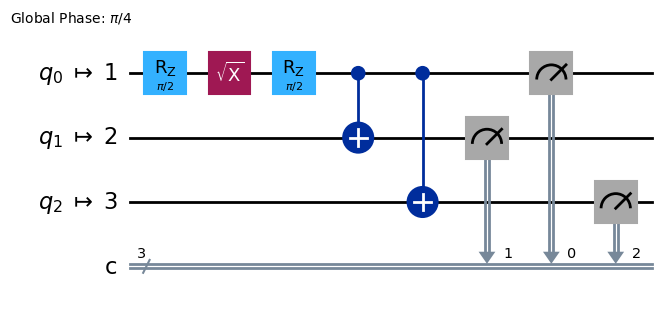

In [40]:
# TODO: Draw the transpiled circuit using Nairobi V2 backend
backend = FakeNairobiV2()

sampler = SamplerV2(backend)
transpiled_qc = transpile(qc, backend)

transpiled_qc.draw('mpl')

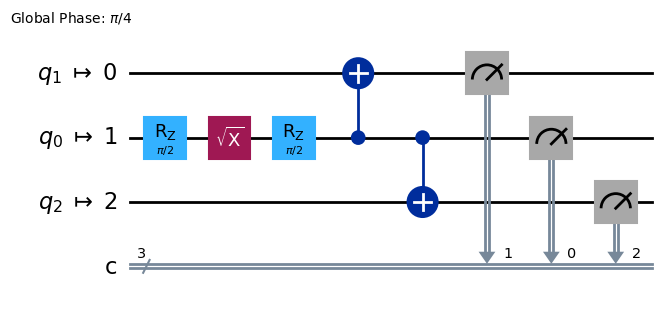

In [41]:
# TODO: Draw the transpiled circuit using Lima V2 backend
backend = FakeLimaV2()

sampler = SamplerV2(backend)
transpiled_qc = transpile(qc, backend)

transpiled_qc.draw('mpl')

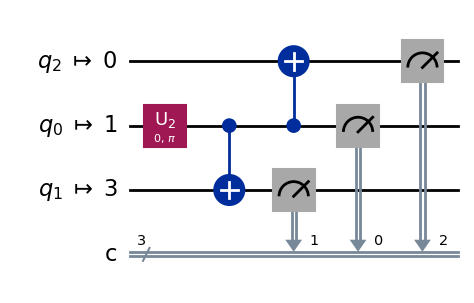

In [42]:
# TODO: Draw the transpiled circuit using London V2 backend
backend = FakeLondonV2()

sampler = SamplerV2(backend)
transpiled_qc = transpile(qc, backend)

transpiled_qc.draw('mpl')

**Note**: These transpiled circuits will not run because of the hardware limitations of those backends. Especially, the CX gates won't work because different qubits need to interact with each other.

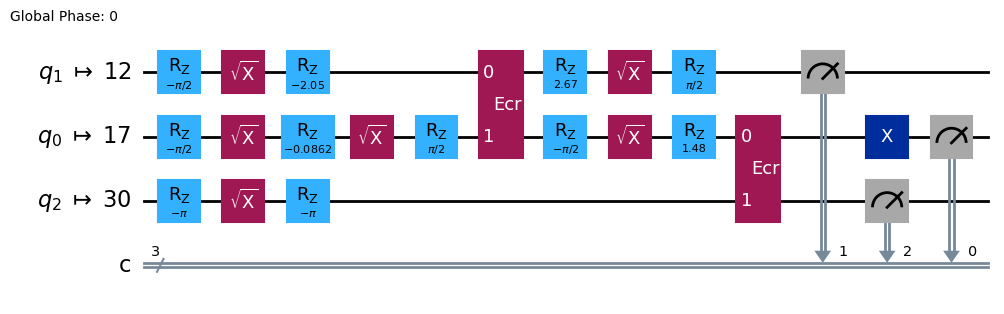

In [43]:
## TODO: Run this GHZ+ circuit on Brisbane and plot histogram of results
backend = FakeBrisbane()

sampler = SamplerV2(backend)
transpiled_qc = transpile(qc, backend)

transpiled_qc.draw('mpl')

## Optimization Levels

In [44]:
## TODO: Create your custom SWAP circuit and transpile it on different backends
# DO NOT USE THE INBUILT SWAP GATE

def swap(circuit, target1, target2):
    circuit.barrier(target1, target2)
    
    circuit.cx(target1, target2)
    circuit.cx(target2, target1)
    circuit.cx(target1, target2)
    
    circuit.barrier(target1, target2)
    
    return circuit

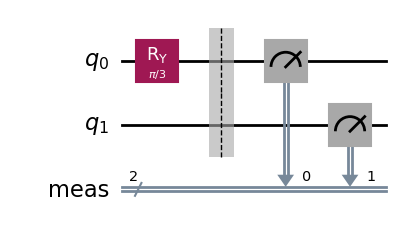

In [45]:
from numpy import pi

## Initial state before SWAP is approx: (0.866|0> + 0.5|1>) |0>
qc_initial = QuantumCircuit(2)
qc_initial.ry(pi/3, 0)

qc_initial.measure_all()
qc_initial.draw('mpl')


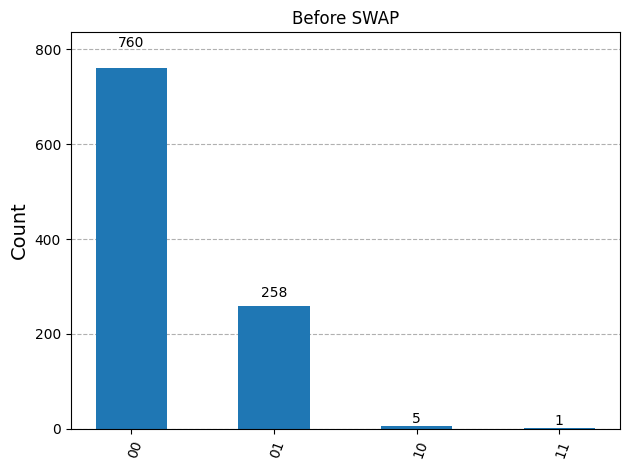

In [46]:
sampler = SamplerV2(backend)

transpiled_qc_initial = transpile(qc_initial, backend)
original_result = sampler.run([transpiled_qc_initial], shots=1024).result()[0]
original_counts = original_result.join_data().get_counts()
plot_histogram(original_counts, title="Before SWAP")

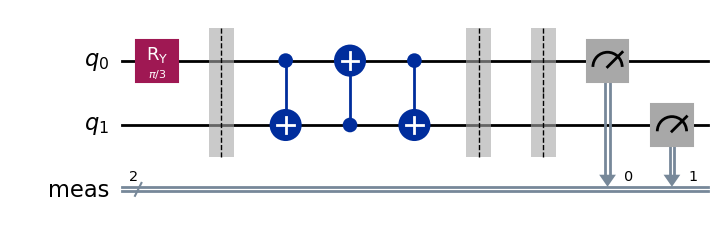

In [47]:
from numpy import pi

## Final state after SWAP should be approx: (0.866|0> + 0.5|1>) |0>
qc_after = QuantumCircuit(2)
qc_after.ry(pi/3, 0)

# Custom SWAP gate applied here (nothing to do here)
qc_after = swap(qc_after, 0, 1)

qc_after.measure_all()

qc_after.draw('mpl')


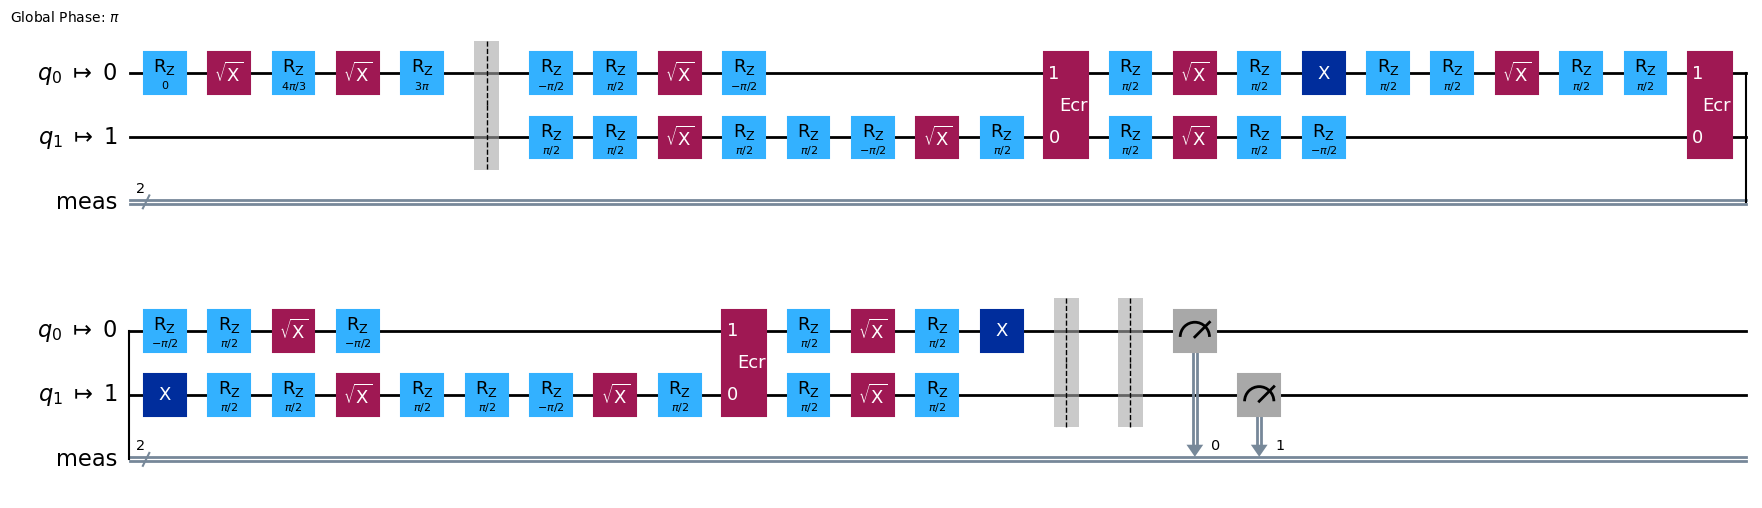

In [48]:
backend = FakeBrisbane()

transpiled_qc_0 = transpile(qc_after, backend, optimization_level=0)
transpiled_qc_0.draw('mpl')

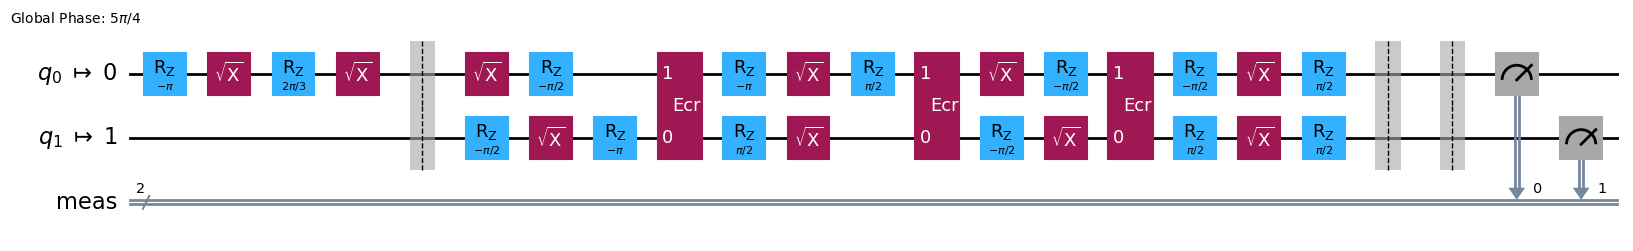

In [49]:
## TODO: Use optimization level 1
backend = FakeBrisbane()

transpiled_qc_1 = transpile(qc_after, backend, optimization_level=1)
transpiled_qc_1.draw('mpl')

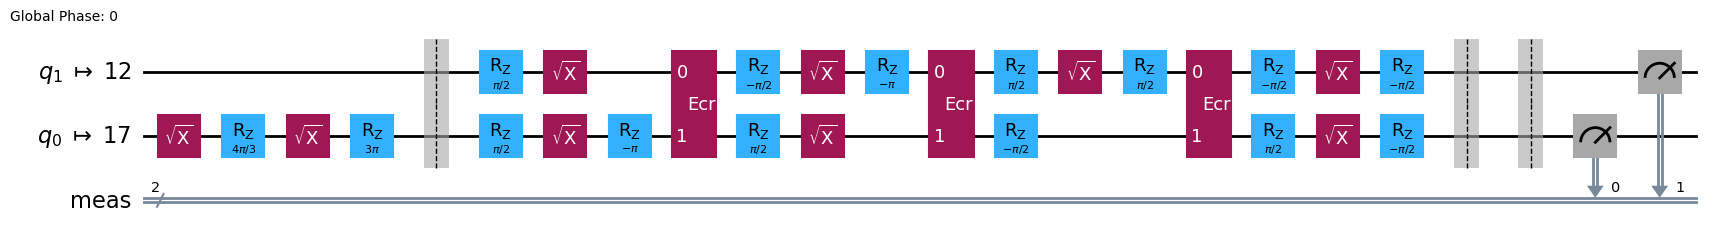

In [50]:
## TODO: Use optimization level 2
backend = FakeBrisbane()

transpiled_qc_2 = transpile(qc_after, backend, optimization_level=2)
transpiled_qc_2.draw('mpl')

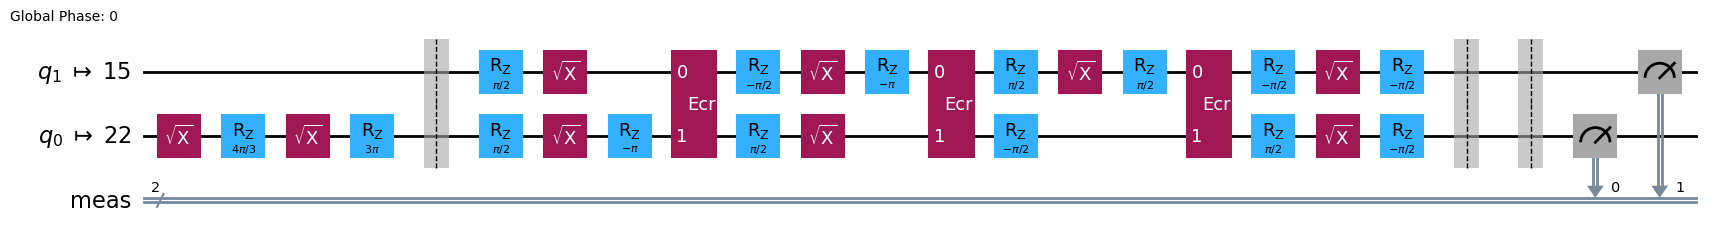

In [51]:
## TODO: Use optimization level 3
backend = FakeBrisbane()

transpiled_qc_3 = transpile(qc_after, backend, optimization_level=3)
transpiled_qc_3.draw('mpl')

In [52]:
# TODO: Add your transpiled circuits here:
transpiled_circuits = [
    transpiled_qc_0,
    transpiled_qc_1,
    transpiled_qc_2,
    transpiled_qc_3
    ]

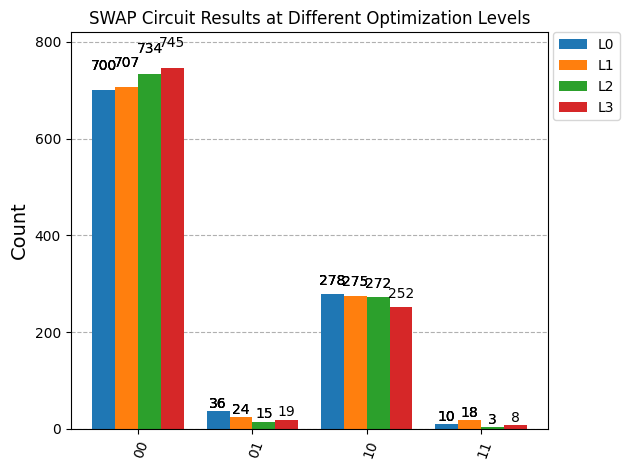

In [53]:
# Display histograms of results for all optimization levels
sampler = SamplerV2(backend)
all_counts = []
all_legends = []
for i, transpiled_qc in enumerate(transpiled_circuits):
    all_legends.append(f"L{i}")
    transpiled_results = sampler.run([transpiled_qc], shots=1024).result()[0]
    transpiled_counts = transpiled_results.join_data().get_counts()
    all_counts.append(transpiled_counts)

plot_histogram(all_counts, legend=all_legends, title="SWAP Circuit Results at Different Optimization Levels")